In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [16]:
tickers=["GOOGL"]
df=yf.download(tickers,start="2010-1-1",end="2023-1-22",group_by=tickers)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00-05:00,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
2010-01-05 00:00:00-05:00,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2010-01-06 00:00:00-05:00,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
2010-01-07 00:00:00-05:00,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
2010-01-08 00:00:00-05:00,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [17]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-13 00:00:00-05:00,90.849998,92.190002,90.129997,92.120003,92.120003,26309900
2023-01-17 00:00:00-05:00,92.059998,92.250000,90.050003,91.290001,91.290001,32602400
2023-01-18 00:00:00-05:00,92.139999,92.800003,90.639999,91.120003,91.120003,29116700
2023-01-19 00:00:00-05:00,90.720001,93.610001,90.629997,93.050003,93.050003,37000400
2023-01-20 00:00:00-05:00,95.099998,98.300003,95.019997,98.019997,98.019997,63037300


In [18]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04 00:00:00-05:00,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05 00:00:00-05:00,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06 00:00:00-05:00,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07 00:00:00-05:00,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08 00:00:00-05:00,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [19]:
df= df.drop(['Date', 'Volume', 'Adj Close'], axis= 1)
df.head()

,Open,High,Low,Close
0,15.689439,15.753504,15.621622,15.684434
1,15.695195,15.711712,15.554054,15.615365
2,15.662162,15.662162,15.174174,15.221722
3,15.250250,15.265265,14.831081,14.867367
4,14.814815,15.096346,14.742492,15.065566


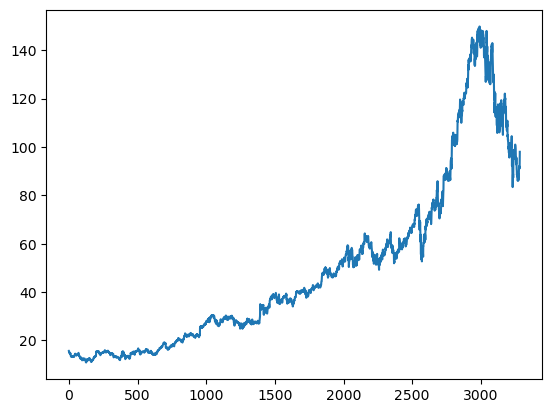

In [21]:
plt.plot(df.Close)


In [22]:
df

,Open,High,Low,Close
0,15.689439,15.753504,15.621622,15.684434
1,15.695195,15.711712,15.554054,15.615365
2,15.662162,15.662162,15.174174,15.221722
3,15.250250,15.265265,14.831081,14.867367
4,14.814815,15.096346,14.742492,15.065566
...,...,...,...,...
3280,90.849998,92.190002,90.129997,92.120003
3281,92.059998,92.250000,90.050003,91.290001
3282,92.139999,92.800003,90.639999,91.120003
3283,90.720001,93.610001,90.629997,93.050003


In [23]:
ma100= df.Close.rolling(100).mean()

In [24]:
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
3280    97.4016
3281    97.1759
3282    96.9502
3283    96.7142
3284    96.5910
Name: Close, Length: 3285, dtype: float64

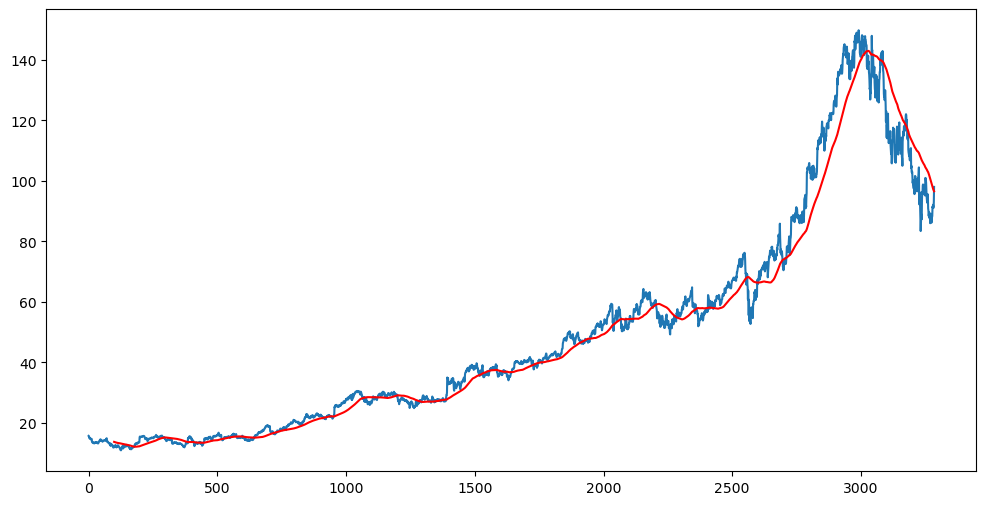

In [25]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [26]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3280    107.332660
3281    107.079417
3282    106.839680
3283    106.604177
3284    106.379420
Name: Close, Length: 3285, dtype: float64

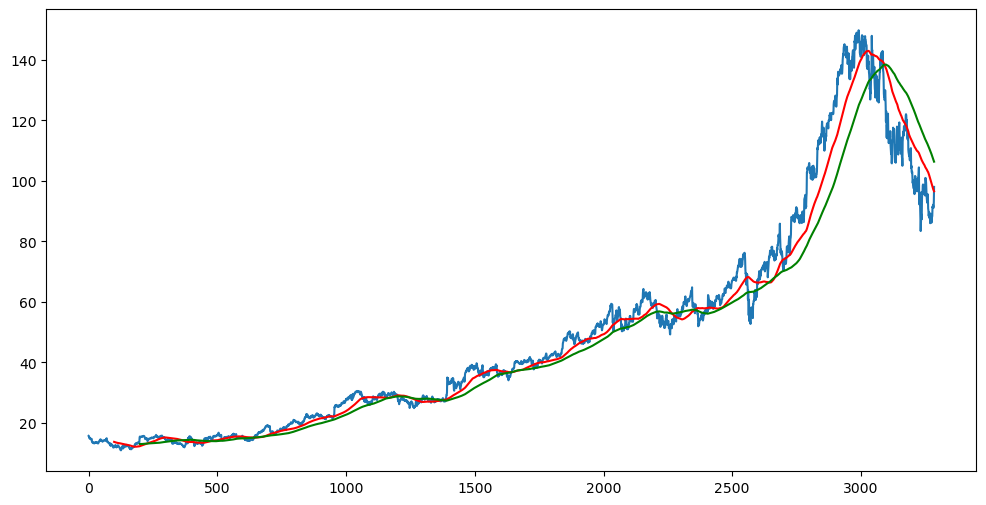

In [29]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [30]:
df.shape

(3285, 4)

In [31]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2299, 1)
(986, 1)


In [32]:
data_training.head()

,Close
0,15.684434
1,15.615365
2,15.221722
3,14.867367
4,15.065566


In [33]:
data_testing.head()

,Close
2299,55.827999
2300,55.866501
2301,56.100498
2302,56.144501
2303,56.327499


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.08942207],
       [0.08812773],
       [0.08075093],
       ...,
       [0.85102787],
       [0.84548086],
       [0.83013295]])

In [42]:
data_training_array.shape

(2299, 1)

In [44]:
x_train = []

y_train = []
for i in range(100, data_training_array.shape[0]): 
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
    
x_train, y_train = np.array(x_train), np.array(y_train)


In [47]:
x_train.shape

(2199, 100, 1)

In [55]:
from keras.layers import Dense, Dropout, LSTM

from keras.models import Sequential

ModuleNotFoundError: No module named 'keras'

In [54]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout (0.2))


model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, ))
model.add(Dropout (0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True, ))
model.add(Dropout (0.4))


model.add(LSTM(units = 120, activation = 'relu', return_sequences = True, ))
model.add(Dropout (0.5)) 

model.add(Dense(units=1))

NameError: name 'Sequential' is not defined

In [56]:
model.compile(optimizer='adam', loss = 'mean_squared_error') model.fit(x_train, y_train, epochs = 50) 

SyntaxError: invalid syntax (1264897171.py, line 1)

In [57]:
model.save('keras_model.h5')

data_testing.head()

NameError: name 'model' is not defined

In [58]:
past_100_days = data_training.tail (100)

final_df = past_100_days.append(data_testing, ignore_index=True)

final_df.head()

C:\Users\abhin\AppData\Local\Temp\ipykernel_17840\3991761665.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


,Close
0,60.368000
1,60.354000
2,60.426498
3,60.382000
4,60.576500


In [65]:
x_test = []

y_test = []

for i in range(100, input_data.shape[0]):

    x_test.append(input_data[i-100: i]) y_test.append(input_data[i-100: i])
    y_test.append(input_data[i-100: i]) y_test.append(input_data[i, 0])






SyntaxError: invalid syntax (4267372978.py, line 7)

In [66]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

NameError: name 'x_test' is not defined

In [67]:
y_predicted model.predict(x_test)

y_predicted. shape

SyntaxError: invalid syntax (3051011351.py, line 1)

In [69]:
scale_factor = 1/0.02099517

y_predicted = y_predicted * scale_factor

y_test = y_test * scale_factor

NameError: name 'y_predicted' is not defined

In [71]:
plt.figure(figsize=(12,6))

plt.plot(y_test, 'b', label = 'Original Price')

plt.plot(y_predicted, 'r', label = 'Predicted Price')

plt.xlabel('Time')

plt.ylabel('Price')

plt.legend()

plt.show()

NameError: name 'y_test' is not defined

<Figure size 1200x600 with 0 Axes>